# House Prices - Advanced Regression Techniques

Thursday, 23 August 2018

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Goal: Predict sales prices and practice feature engineering, RFs, and gradient boosting

## Import libraries and packages

In [217]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
# from jupyterthemes import jtplot; jtplot.style()

In [0]:
# import packages and libraries
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
# Set the maximum number of columns displayed
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore") #warning suppressor

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 10 # Set default font size

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)

## Load data

In [220]:
# read in training and test data
df_train = pd.read_csv('/content/gdrive/My Drive/Data Science/Springboard/capstone_project/data_ames-housing/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Keep the Id for the train set. The SalePrice column is only available for the training set.

In [221]:
df_test = pd.read_csv('/content/gdrive/My Drive/Data Science/Springboard/capstone_project/data_ames-housing/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


__Note:__ Id 1 - 1460 (1460 rows) is the training set and Id 1461 to 2919 (1459 rows) is the test set. Let's keep this 50-50 train-test split in mind.

In [0]:
# From here on forward, we will only use df_train
df = df_train.copy()

## Exploratory data analysis

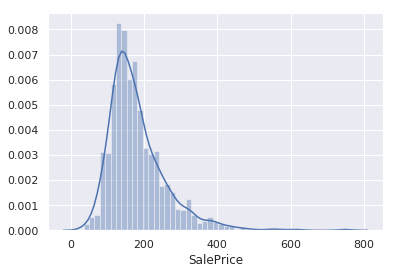

In [223]:
# distribution of housing sale price
# sns.distplot(df['SalePrice'].dropna()/1000, kde=False, rug=True);
sns.distplot(df['SalePrice'].dropna()/1000, kde=True, rug=False);

In [224]:
# skew and kurtosis
print("Skewness: {:.2f}".format(df['SalePrice'].skew()))
print("Kurtosis: {:.2f}".format(df['SalePrice'].kurt()))

Skewness: 1.88
Kurtosis: 6.54


__Housing Sale Price distribution__: The histogram and the skewness/kurtosis scores shows that the House Sale Price is not normally distributed. This can limit the effectiveness of some ML regression models.

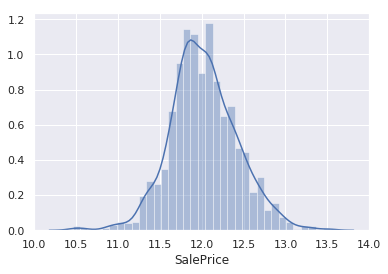

In [225]:
# SalePrice distribution after taking the logarithm
sns.distplot(np.log(df['SalePrice'].dropna()), kde=True, rug=False);

In [226]:
# skew and kurtosis after taking logarithm
print("Skewness: {:.2f}".format(np.log(df['SalePrice']).skew()))
print("Kurtosis: {:.2f}".format(np.log(df['SalePrice']).kurt()))

Skewness: 0.12
Kurtosis: 0.81


Taking the logarithm of the SalePrice gives a normal distribution.

In [227]:
# save a dataframe with logarithm of SalePrice
df_log = df.copy()
df_log['SalePrice_log'] = np.log(df['SalePrice'])
df_log = df_log.drop(columns=['SalePrice'])

df_log.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_log
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


In [228]:
# what types of columns are we dealing with?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [229]:
# basic stats for numeric columns
df.describe(include=np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [230]:
# how many numerical columns?
print("# of numerical features: {}".format(len(df.describe(include=np.number).columns)))

# of numerical features: 38


In [231]:
# basic stats for non-numerical columns
df.describe(include=np.object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [232]:
# how many non-numerical columns
print("# of categorical features: {}".format(len(df.describe(include=np.object).columns)))

# of categorical features: 43


## Data wrangling

###  Missing values

In [233]:
# identify missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing / len(df) * 100
missing = missing[missing > 0]

print(missing);

# missing.plot.bar();plt.grid(b=None); 
# plt.title('Percentage of missing values'); plt.xticks(rotation=90);

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


Looking at the [data documentation](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) more closely, we can see that missing values has meaning for many columns.


In [0]:
# meaningful missing values
col_fillna = ['Alley',
              'Fence',
              'MasVnrType',
              'BsmtQual',
              'BsmtCond',
              'BsmtExposure',
              'BsmtFinType1',
              'BsmtFinType2',
              'FireplaceQu',
              'GarageType',
              'GarageFinish',
              'GarageQual',
              'GarageCond',
              'PoolQC',
              'MiscFeature'
              ]

for col in col_fillna:
  df[col].fillna('NA', inplace=True)

In [235]:
# identify missing values - after dealing with columns with meaningful missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing / len(df) * 100
missing = missing[missing > 0]

print(missing);

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64


For the remaining columns with missing values...

*  Numerical columns: fill null values with median value
*  Categorical columns:  fill null values with most common value (i.e. median)




In [236]:
# store name of remaining columns containing null values
col_mis_val = [col for col in df.columns if df[col].isnull().any()]
col_mis_val

['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt']

In [0]:
# fill missing values
for col in col_mis_val:
  if df[col].dtype == np.object:
    df[col] = df[col].fillna(df[col].value_counts().index[0]) 
    # if object column, fill with most common value
  else:
    df[col] = df[col].fillna(df[col].median())
    # if numerical column, fill with median value

In [238]:
# check to see if any null values remain
df.isnull().sum().sum()

0

In [239]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


### Ordinal features

*   ExterQual: Ex > Gd > TA > Fa > Po
*   ExterCond: Ex > Gd > TA > Fa > Po
*   BsmtQual: Ex > Gd > TA > Fa > Po > NA
*   BsmtCond: Ex > Gd > TA > Fa > Po > NA
*   BsmtExposure: Gd > Av > Mn > No >  NA
*   BsmtFinType1: GLQ > ALQ > BLQ > Rec > LwQ > Unf > NA
*   BsmtFinType2: GLQ > ALQ > BLQ > Rec > LwQ > Unf > NA
*   HeatingQC: Ex > Gd > TA > Fa > Po
*   KitchenQual: Ex > Gd > TA > Fa > Po
*   Functional: Typ > Min1 > Min2 > Mod > Maj1 > Maj2 > Sev > Sal
*   FireplaceQu: Ex > Gd > TA > Fa > Po > NA
*   GarageType: Ex > Gd > TA > Fa > Po > NA
*   GarageCond: Ex > Gd > TA > Fa > Po > NA
*   PoolQC: Ex > Gd > TA > Fa > NA



In [0]:
# ordinal column names
col_ord = [
          'ExterQual',
          'ExterCond',
          'BsmtQual',
          'BsmtCond',
          'BsmtExposure',
          'BsmtFinType1',
          'BsmtFinType2',
          'HeatingQC',
          'KitchenQual',
          'Functional',
          'FireplaceQu',
          'GarageQual',
          'GarageCond',
          'PoolQC'
]

In [0]:
# encode ordinal columns
# ExterQual, ExterCond, KitchenQual, HeatingQC: Ex > Gd > TA > Fa > Po
scale_1 ={'Ex':5,
          'Gd':4,
          'TA':3,
          'Fa':2,
          'Po':1}

df[['ExterQual_scaled',
    'ExterCond_scaled',
    'KitchenQual_scaled',
    'HeatingQC_scaled']] = df[['ExterQual','ExterCond','KitchenQual','HeatingQC']].replace(scale_1)

# #BsmtQual, BsmtCond, FireplaceQu, GarageQual, GarageCond: Ex > Gd > TA > Fa > Po > NA
scale_2 = {'Ex':5,
           'Gd':4,
           'TA':3,
           'Fa':2,
           'Po':1,
           'NA':0}

df[['BsmtQual_scaled',
    'BsmtCond_scaled',
    'FireplaceQu_scaled',
    'GarageQual_scaled',
    'GarageCond_scaled']] = df[['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']].replace(scale_2)

# BsmtExposure: Gd > Av > Mn > No > NA
scale_3 = {'Gd':4,
           'Av':3,
           'Mn':2,
           'No':1,
           'NA':0}

df['BsmtExposure_scaled'] = df['BsmtExposure'].replace(scale_3)

# BsmtFinType1, BsmtFinType2: GLQ > ALQ > BLQ > Rec > LwQ > Unf > NA
scale_4 ={'GLQ':6,
          'ALQ':5,
          'BLQ':4,
          'Rec':3,
          'LwQ':2,
          'Unf':1,
          'NA' :0}
                            
df[['BsmtFinType1_scaled',
    'BsmtFinType2_scaled']] = df[['BsmtFinType1', 'BsmtFinType2']].replace(scale_4)

# Functional: Typ > Min1 > Min2 > Mod > Maj1 > Maj2 > Sev > Sal
scale_5 = {'Typ' : 8,
           'Min1': 7,
           'Min2': 6,
           'Mod' : 5,
           'Maj1': 4,
           'Maj2': 3,
           'Sev' : 2,
           'Sal' : 1}

df['Functional_scaled'] = df['Functional'].replace(scale_5)

# PoolQC: Ex > Gd > TA > Fa > NA
scale_6 = {'Ex':4,
           'Gd':3,
           'TA':2,
           'Fa':1,
           'NA':0}
                            
df['PoolQC_scaled'] = df['PoolQC'].replace(scale_6)

In [242]:
# check the scaled ordinal columns
df[df.columns[-14:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
ExterQual_scaled       1460 non-null int64
ExterCond_scaled       1460 non-null int64
KitchenQual_scaled     1460 non-null int64
HeatingQC_scaled       1460 non-null int64
BsmtQual_scaled        1460 non-null int64
BsmtCond_scaled        1460 non-null int64
FireplaceQu_scaled     1460 non-null int64
GarageQual_scaled      1460 non-null int64
GarageCond_scaled      1460 non-null int64
BsmtExposure_scaled    1460 non-null int64
BsmtFinType1_scaled    1460 non-null int64
BsmtFinType2_scaled    1460 non-null int64
Functional_scaled      1460 non-null object
PoolQC_scaled          1460 non-null int64
dtypes: int64(13), object(1)
memory usage: 159.8+ KB


In [243]:
# strangely the Functional_scaled column is still categorical
df['Functional_scaled'].value_counts()

8    1360
6      34
7      31
5      15
4      14
3       5
2       1
Name: Functional_scaled, dtype: int64

In [244]:
df['Functional_scaled'].value_counts().index

Int64Index([8, 6, 7, 5, 4, 3, 2], dtype='int64')

In [0]:
# convert Functional_scaled to numerical
df['Functional_scaled'] = df['Functional_scaled'].astype(dtype='int64')

In [246]:
# drop the original ordinal columns
df = df.drop(col_ord, axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_scaled,ExterCond_scaled,KitchenQual_scaled,HeatingQC_scaled,BsmtQual_scaled,BsmtCond_scaled,FireplaceQu_scaled,GarageQual_scaled,GarageCond_scaled,BsmtExposure_scaled,BsmtFinType1_scaled,BsmtFinType2_scaled,Functional_scaled,PoolQC_scaled
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,706,0,150,856,GasA,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,8,0,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,NA,NA,0,2,2008,WD,Normal,208500,4,3,4,5,4,3,0,3,3,1,6,1,8,0
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,978,0,284,1262,GasA,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,6,1,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,NA,NA,0,5,2007,WD,Normal,181500,3,3,3,5,4,3,3,3,3,4,5,1,8,0
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,486,0,434,920,GasA,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,6,1,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,NA,NA,0,9,2008,WD,Normal,223500,4,3,4,5,4,3,3,3,3,2,6,1,8,0
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,216,0,540,756,GasA,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,7,1,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,0,0,NA,NA,0,2,2006,WD,Abnorml,140000,3,3,4,4,3,4,4,3,3,1,5,1,8,0
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,655,0,490,1145,GasA,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,9,1,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,0,0,NA,NA,0,12,2008,WD,Normal,250000,4,3,4,5,4,3,3,3,3,3,6,1,8,0


In [247]:
df.shape

(1460, 81)

### Encode categorical columns

In [248]:
# how many categorical columns remain?
print("# of remaining categorical features: {}".format(len(df.select_dtypes(include='object').columns)))

# of remaining categorical features: 29


In [249]:
# view categorical columns
df.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,RFn,Y,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,RFn,Y,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,RFn,Y,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Detchd,Unf,Y,NA,NA,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,RFn,Y,NA,NA,WD,Normal
5,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,Wood,GasA,Y,SBrkr,Attchd,Unf,Y,MnPrv,Shed,WD,Normal
6,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,PConc,GasA,Y,SBrkr,Attchd,RFn,Y,NA,NA,WD,Normal
7,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,CBlock,GasA,Y,SBrkr,Attchd,RFn,Y,NA,Shed,WD,Normal
8,RM,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,BrkTil,GasA,Y,FuseF,Detchd,Unf,Y,NA,NA,WD,Abnorml
9,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,BrkTil,GasA,Y,SBrkr,Attchd,RFn,Y,NA,NA,WD,Normal


In [0]:
# encode categorical features using sklearn's LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.select_dtypes(include='object'):
  df[col] = le.fit_transform(df[col])

In [251]:
# confirm there are no categorical features remaining
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id                     1460 non-null int64
MSSubClass             1460 non-null int64
MSZoning               1460 non-null int64
LotFrontage            1460 non-null float64
LotArea                1460 non-null int64
Street                 1460 non-null int64
Alley                  1460 non-null int64
LotShape               1460 non-null int64
LandContour            1460 non-null int64
Utilities              1460 non-null int64
LotConfig              1460 non-null int64
LandSlope              1460 non-null int64
Neighborhood           1460 non-null int64
Condition1             1460 non-null int64
Condition2             1460 non-null int64
BldgType               1460 non-null int64
HouseStyle             1460 non-null int64
OverallQual            1460 non-null int64
OverallCond            1460 non-null int64
YearBuilt              1460 non-null int64
YearRemodAdd           1460 non

## Feature selection

In [0]:
# separate features from target (also drop Id in the process)
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

In [253]:
# store the column names
features_to_include = X.columns
features_to_include

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'ExterQual_scale

In [0]:
# Determine which feature is important
from sklearn import feature_selection

feature_importances = feature_selection.mutual_info_regression(X, y)

feat_importance_df = pd.DataFrame(list(zip(features_to_include,feature_importances)), columns=['feature','importance'])

feat_importance_df.sort_values(by='importance', ascending=False, inplace=True)

In [255]:
feat_importance_df

,feature,importance
16,OverallQual,0.578059
11,Neighborhood,0.508680
37,GrLivArea,0.482478
30,TotalBsmtSF,0.368667
18,YearBuilt,0.367578
50,GarageArea,0.364077
49,GarageCars,0.352387
69,BsmtQual_scaled,0.338043
67,KitchenQual_scaled,0.331810
65,ExterQual_scaled,0.326828


Does this result make sense? 


*   OverallQual: Rates the overall material and finish of the house
*   Neighborhood: Physical locations within Ames city limits
*   GrLivArea: Above grade (ground) living area square feet
*   1stFlrSF: First Floor square feet
*   YearBuilt: Original construction date

Yes, all of the top features intuitively would contribute to the housing sale price. Let's keep these top features in mind; however, I will not remove any features using this information right now.



## Fit the model

### Train-test split

In [0]:
# let's split the data before encoding categorical features
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
X_train.shape

(1168, 79)

In [258]:
X_test.shape

(292, 79)

###  OLS regression

In [0]:
from sklearn.linear_model import LinearRegression

reg_1 = LinearRegression()

In [0]:
reg_1 = reg_1.fit(X_train, y_train)

In [261]:
# accuracy score on train set
print("Accuracy score on train set: {:.4f}".format(reg_1.score(X_train, y_train))) # R2 score (coefficient of determination)

Accuracy score on train set: 0.8411


In [262]:
# accuracy score on test set
print("Accuracy score on test set: {:.4f}".format(reg_1.score(X_test, y_test))) # R2 score (coefficient of determination)

Accuracy score on test set: 0.8485


In [341]:
# calculate root mean squared error on training set
rmse_1a = (np.mean((reg_1.predict(X_train) - y_train)**2))**0.5
rmse_1a

30781.40610937663

In [342]:
# calculate root mean squared error on test set
rmse_1b = (np.mean((reg_1.predict(X_test) - y_test)**2))**0.5
rmse_1b

34083.755192098186

In [345]:
# double check with a different method
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, (reg_1.predict(X_test)))**0.5

34083.755192098186

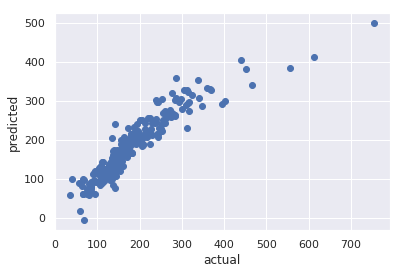

In [346]:
plt.scatter(y_test/1000, reg_1.predict(X_test)/1000);
plt.xlabel('actual');
plt.ylabel('predicted');

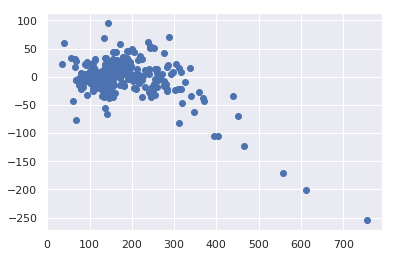

In [347]:
# check the residuals
plt.scatter(y_test/1000, (reg_1.predict(X_test) - y_test)/1000);

### OLS regression (sample_weight=y_train)



In [0]:
# fit multiple linear regression model
reg_2 = LinearRegression()

reg_2 = reg_2.fit(X_train, y_train, sample_weight=y_train)

In [331]:
# accuracy score on train set
print("Accuracy score on train set: {:.4f}".format(reg_2.score(X_train, y_train, sample_weight=y_train))) # R2 score (coefficient of determination)

Accuracy score on train set: 0.8633


In [332]:
# accuracy score on test set
print("Accuracy score on test set: {:.4f}".format(reg_2.score(X_test, y_test, sample_weight=y_test))) # R2 score (coefficient of determination)

Accuracy score on test set: 0.8519


In [348]:
# calculate root mean squared error on training set
rmse_2a = (np.mean((reg_2.predict(X_train) - y_train)**2))**0.5
rmse_2a

32998.91705553665

In [349]:
# calculate root mean squared error on test set
rmse_2b = (np.mean((reg_2.predict(X_test) - y_test)**2))**0.5
rmse_2b

33495.47747496936

### OLS regression (sample_weight=y_train**2)

In [0]:
reg_3 = LinearRegression()

reg_3 = reg_3.fit(X_train, y_train, sample_weight=y_train**2)

In [274]:
# accuracy score on train set
print("Accuracy score on train set: {:.4f}".format(reg_3.score(X_train, y_train, sample_weight=y_train**2))) # R2 score (coefficient of determination)

Accuracy score on train set: 0.8996


In [275]:
# accuracy score on test set
print("Accuracy score on test set: {:.4f}".format(reg_3.score(X_test, y_test, sample_weight=y_test**2))) # R2 score (coefficient of determination)

Accuracy score on test set: 0.8626


In [350]:
# calculate root mean squared error on training set
rmse_3a = (np.mean((reg_3.predict(X_train) - y_train)**2))**0.5
rmse_3a

37787.05800359654

In [351]:
# calculate root mean squared error on test set
rmse_3b = (np.mean((reg_3.predict(X_test) - y_test)**2))**0.5
rmse_3b

35360.61488314426

### OLS regression (sample_weight=y_train**3)

In [0]:
reg_4 = LinearRegression()

reg_4 = reg_4.fit(X_train, y_train, sample_weight=y_train**3)

In [277]:
# accuracy score on train set
print("Accuracy score on train set: {:.4f}".format(reg_4.score(X_train, y_train, sample_weight=y_train**3))) # R2 score (coefficient of determination)

Accuracy score on train set: 0.9342


In [278]:
# accuracy score on test set
print("Accuracy score on test set: {:.4f}".format(reg_4.score(X_test, y_test, sample_weight=y_test**3))) # R2 score (coefficient of determination)

Accuracy score on test set: 0.8689


In [352]:
# calculate root mean squared error on training set
rmse_4a = (np.mean((reg_4.predict(X_train) - y_train)**2))**0.5
rmse_4a

43884.66389458925

In [353]:
# calculate root mean squared error on test set
rmse_4b = (np.mean((reg_4.predict(X_test) - y_test)**2))**0.5
rmse_4b

39723.03965088024

### Ridge regression (alpha = 1)

In [0]:
from sklearn.linear_model import Ridge

In [0]:
ridgereg_1 = Ridge(alpha=1)

In [283]:
ridgereg_1.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [284]:
# accuracy score on train set
print("Accuracy score on train set: {:.4f}".format(ridgereg_1.score(X_train, y_train))) # R2 score (coefficient of determination)

Accuracy score on train set: 0.8410


In [285]:
# accuracy score on test set
print("Accuracy score on test set: {:.4f}".format(ridgereg_1.score(X_test, y_test))) # R2 score (coefficient of determination)

Accuracy score on test set: 0.8489


In [354]:
# calculate root mean squared error on training set
rmse_5a = (np.mean((ridgereg_1.predict(X_train) - y_train)**2))**0.5
rmse_5a

30797.744019194386

In [355]:
# calculate root mean squared error on test set
rmse_5b = (np.mean((ridgereg_1.predict(X_test) - y_test)**2))**0.5
rmse_5b

34044.077977642286

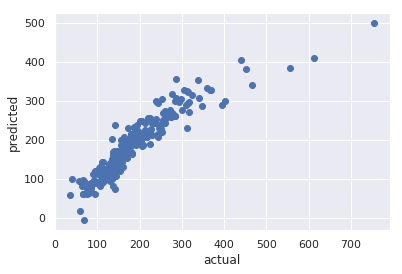

In [357]:
plt.scatter(y_test / 1000, ridgereg_1.predict(X_test) / 1000);
plt.xlabel('actual');
plt.ylabel('predicted');

In [289]:
# compare coefficients - regular regression
max(reg_1.coef_)

22520.1292873061

In [290]:
# compare coefficients - ridge regression
max(ridgereg_1.coef_)

19933.915146579424

We can see that regularization (ridge regression) dampens the coefficients.

### Ridge regression (alpha = 0.1)

In [0]:
ridgereg_2 = Ridge(alpha=0.1)

In [292]:
ridgereg_2.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [293]:
# accuracy score on train set
print("Accuracy score on train set: {:.4f}".format(ridgereg_2.score(X_train, y_train))) # R2 score (coefficient of determination)

Accuracy score on train set: 0.8411


In [294]:
# accuracy score on test set
print("Accuracy score on test set: {:.4f}".format(ridgereg_2.score(X_test, y_test))) # R2 score (coefficient of determination)

Accuracy score on test set: 0.8486


In [358]:
# calculate root mean squared error on training set
rmse_6a = (np.mean((ridgereg_2.predict(X_train) - y_train)**2))**0.5
rmse_6a

30781.96712017492

In [359]:
# calculate root mean squared error on test set
rmse_6b = (np.mean((ridgereg_2.predict(X_test) - y_test)**2))**0.5
rmse_6b

34079.234712969985

### Ridge regression (alpha = 0.01)

In [0]:
ridgereg_3 = Ridge(alpha=0.01)

In [298]:
ridgereg_3.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [299]:
# accuracy score on train set
print("Accuracy score on train set: {:.4f}".format(ridgereg_3.score(X_train, y_train))) # R2 score (coefficient of determination)

Accuracy score on train set: 0.8411


In [300]:
# accuracy score on test set
print("Accuracy score on test set: {:.4f}".format(ridgereg_3.score(X_test, y_test))) # R2 score (coefficient of determination)

Accuracy score on test set: 0.8486


In [360]:
# calculate root mean squared error on training set
rmse_7a = (np.mean((ridgereg_3.predict(X_train) - y_train)**2))**0.5
rmse_7a

30781.412868803454

In [361]:
# calculate root mean squared error on test set
rmse_7b = (np.mean((ridgereg_3.predict(X_test) - y_test)**2))**0.5
rmse_7b

34083.292859152425

### Ridge regression (alpha = 10)

In [0]:
ridgereg_4 = Ridge(alpha=10)

In [304]:
ridgereg_4.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [305]:
# accuracy score on train set
print("Accuracy score on train set: {:.4f}".format(ridgereg_4.score(X_train, y_train))) # R2 score (coefficient of determination)

Accuracy score on train set: 0.8403


In [306]:
# accuracy score on test set
print("Accuracy score on test set: {:.4f}".format(ridgereg_4.score(X_test, y_test))) # R2 score (coefficient of determination)

Accuracy score on test set: 0.8506


In [362]:
# calculate root mean squared error on training set
rmse_8a = (np.mean((ridgereg_4.predict(X_train) - y_train)**2))**0.5
rmse_8a

30865.648110372316

In [363]:
# calculate root mean squared error on test set
rmse_8b = (np.mean((ridgereg_4.predict(X_test) - y_test)**2))**0.5
rmse_8b

33854.519427343854

### Ridge regression (alpha = 100)

In [0]:
ridgereg_5 = Ridge(alpha=10)

In [310]:
ridgereg_5.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [311]:
# accuracy score on train set
print("Accuracy score on train set: {:.4f}".format(ridgereg_5.score(X_train, y_train))) # R2 score (coefficient of determination)

Accuracy score on train set: 0.8403


In [312]:
# accuracy score on test set
print("Accuracy score on test set: {:.4f}".format(ridgereg_5.score(X_test, y_test))) # R2 score (coefficient of determination)

Accuracy score on test set: 0.8506


In [364]:
# calculate root mean squared error on training set
rmse_9a = (np.mean((ridgereg_5.predict(X_train) - y_train)**2))**0.5
rmse_9a

30865.648110372316

In [365]:
# calculate root mean squared error on test set
rmse_9b = (np.mean((ridgereg_5.predict(X_test) - y_test)**2))**0.5
rmse_9b

33854.519427343854

## Hyperparameter table

In [0]:
# OLS
a1 = round(reg_1.score(X_train, y_train),3)
a2 = round(reg_1.score(X_test, y_test),3)
a3 = round(rmse_1a,2)
a4 = round(rmse_1b,2)

# OLS, sample_weight=y_train
b1 = round(reg_2.score(X_train, y_train, sample_weight=y_train),3)
b2 = round(reg_2.score(X_test, y_test, sample_weight=y_test),3)
b3 = round(rmse_2a,2)
b4 = round(rmse_2b,2)

# OLS, sample_weight=y_train**2
c1 = round(reg_3.score(X_train, y_train, sample_weight=y_train**2),3)
c2 = round(reg_3.score(X_test, y_test, sample_weight=y_test**2),3)
c3 = round(rmse_3a,2)
c4 = round(rmse_3b,2)

# OLS, sample_weight=y_train**3
d1 = round(reg_4.score(X_train, y_train, sample_weight=y_train**3),3)
d2 = round(reg_4.score(X_test, y_test, sample_weight=y_test**3),3)
d3 = round(rmse_4a,2)
d4 = round(rmse_4b,2)

# Ridge, alpha=1
e1 = round(ridgereg_1.score(X_train,y_train),3)
e2 = round(ridgereg_1.score(X_test,y_test),3)
e3 = round(rmse_5a,2)
e4 = round(rmse_5b,2)

# Ridge, alpha=0.1
f1 = round(ridgereg_2.score(X_train,y_train),3)
f2 = round(ridgereg_2.score(X_test,y_test),3)
f3 = round(rmse_6a,2)
f4 = round(rmse_6b,2)


# Ridge, alpha=0.01
g1 = round(ridgereg_3.score(X_train,y_train),3)
g2 = round(ridgereg_3.score(X_test,y_test),3)
g3 = round(rmse_7a,2)
g4 = round(rmse_7b,2)

# Ridge, alpha=10
h1 = round(ridgereg_4.score(X_train,y_train),3)
h2 = round(ridgereg_4.score(X_test,y_test),3)
h3 = round(rmse_8a,2)
h4 = round(rmse_8b,2)

# Ridge, alpha=100
i1 = round(ridgereg_5.score(X_train,y_train),3)
i2 = round(ridgereg_5.score(X_test,y_test),3)
i3 = round(rmse_9a,2)
i4 = round(rmse_9b,2)


hyperparameter = [
    ['OLS', 'N/A', 'N/A', a1, a2, a3, a4],
    ['OLS', 'y_train', 'N/A', b1, b2, b3, b4],
    ['OLS', 'y_train**2', 'N/A', c1, c2, c3, c4],
    ['OLS', 'y_train**3', 'N/A', d1, d2, d3, d4],
    ['Ridge', 'N/A', 1, e1, e2, e3, e4],
    ['Ridge', 'N/A', 0.1, f1, f2, f3, f4],
    ['Ridge', 'N/A', 0.01, g1, g2, g3, g4],
    ['Ridge', 'N/A', 10, h1, h2, h3, h4],
    ['Ridge', 'N/A', 100, i1, i2, i3, i4]
]

In [375]:
hyperparameter_table = pd.DataFrame(hyperparameter, columns = ['Model', 'sample_weight', 'alpha', 'train_r2', 'test_r2', 'train_rmse', 'test_rmse'])
hyperparameter_table

,Model,sample_weight,alpha,train_r2,test_r2,train_rmse,test_rmse
0,OLS,N/A,N/A,0.841,0.849,30781.41,34083.76
1,OLS,y_train,N/A,0.863,0.852,32998.92,33495.48
2,OLS,y_train**2,N/A,0.900,0.863,37787.06,35360.61
3,OLS,y_train**3,N/A,0.934,0.869,43884.66,39723.04
4,Ridge,N/A,1,0.841,0.849,30797.74,34044.08
5,Ridge,N/A,0.1,0.841,0.849,30781.97,34079.23
6,Ridge,N/A,0.01,0.841,0.849,30781.41,34083.29
7,Ridge,N/A,10,0.840,0.851,30865.65,33854.52
8,Ridge,N/A,100,0.840,0.851,30865.65,33854.52


In [376]:
hyperparameter_table.sort_values(by='test_rmse', ascending=True)

,Model,sample_weight,alpha,train_r2,test_r2,train_rmse,test_rmse
1,OLS,y_train,N/A,0.863,0.852,32998.92,33495.48
7,Ridge,N/A,10,0.840,0.851,30865.65,33854.52
8,Ridge,N/A,100,0.840,0.851,30865.65,33854.52
4,Ridge,N/A,1,0.841,0.849,30797.74,34044.08
5,Ridge,N/A,0.1,0.841,0.849,30781.97,34079.23
6,Ridge,N/A,0.01,0.841,0.849,30781.41,34083.29
0,OLS,N/A,N/A,0.841,0.849,30781.41,34083.76
2,OLS,y_train**2,N/A,0.900,0.863,37787.06,35360.61
3,OLS,y_train**3,N/A,0.934,0.869,43884.66,39723.04


## Save the model

In [0]:
# from sklearn.externals import joblib

In [0]:
# joblib.dump(reg, 'linear_model_basic.pkl')

In [0]:
# joblib.dump(ridgereg, 'linear_model_ridge.pkl')

In [0]:
# load model 
# linear_model_basic = joblib.load('linear_model_basic.pkl') 
# linear_model_ridge = joblib.load('linear_model_ridge.pkl') 